# Chapter 2 Problems - R

In [1]:
#### Sytem may require the following: 
# sudo apt install libcurl4-openssl-dev
# sudo apt install libxml2-dev

#### Only need to run the folloing installs once
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", "AICcmodavg"))

## Load Libraries

In [2]:
suppressMessages(library(readxl))
suppressMessages(library(ggplot2))
suppressMessages(library(ggpubr))
suppressMessages(library(tidyverse))
suppressMessages(library(broom))
suppressMessages(library(AICcmodavg))

## 2.1

In [3]:
dataTableB1 <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B1.XLS')

df <- data.frame(y=dataTableB1$y, x=dataTableB1$x8)

head(df)

,y,x
,<dbl>,<dbl>
1,10,2205
2,11,2096
3,11,1847
4,13,1903
5,10,1457
6,11,1848


In [4]:
summary(df)

       y                x       
 Min.   : 0.000   Min.   :1457  
 1st Qu.: 4.000   1st Qu.:1848  
 Median : 6.500   Median :2050  
 Mean   : 6.964   Mean   :2110  
 3rd Qu.:10.000   3rd Qu.:2320  
 Max.   :13.000   Max.   :2876  

In [5]:
cor(df$x, df$y)

[1] -0.7380273

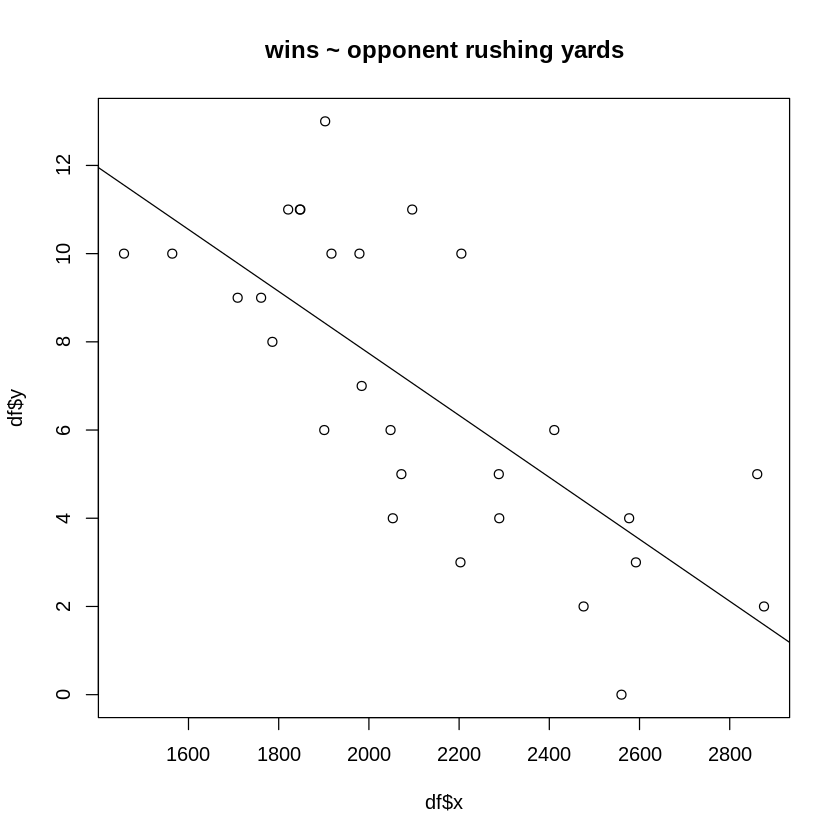

In [7]:
plot(x=df$x, y=df$y, main="wins ~ opponent rushing yards")
abline(Football.lm)

In [8]:
summary(Football.lm)


Call:
lm(formula = y ~ x, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-3.804 -1.591 -0.647  2.032  4.580 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.788251   2.696233   8.081 1.46e-08 ***
x           -0.007025   0.001260  -5.577 7.38e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.393 on 26 degrees of freedom
Multiple R-squared:  0.5447,	Adjusted R-squared:  0.5272 
F-statistic:  31.1 on 1 and 26 DF,  p-value: 7.381e-06


### a

In [6]:
Football.lm <- lm(y ~ x, data=df)  # build linear regression model on full data
print(Football.lm)


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
  21.788251    -0.007025  



### b

In [9]:
anova(Football.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,178.0923,178.092314,31.10324,7.380709e-06
Residuals,26,148.8720,5.725845,NA,NA


### c

In [10]:
 confint(Football.lm, level=0.95)

,2.5 %,97.5 %
(Intercept),16.246064040,27.330437725
x,-0.009614347,-0.004435854


### d

In [11]:
summary(Football.lm)$r.squared

[1] 0.5446843

### e

In [14]:
pred<-predict(Football.lm, data.frame(x = c(2000)), interval="confidence", level=0.95)
print(pred)

      fit      lwr      upr
1 7.73805 6.765753 8.710348


### Extras

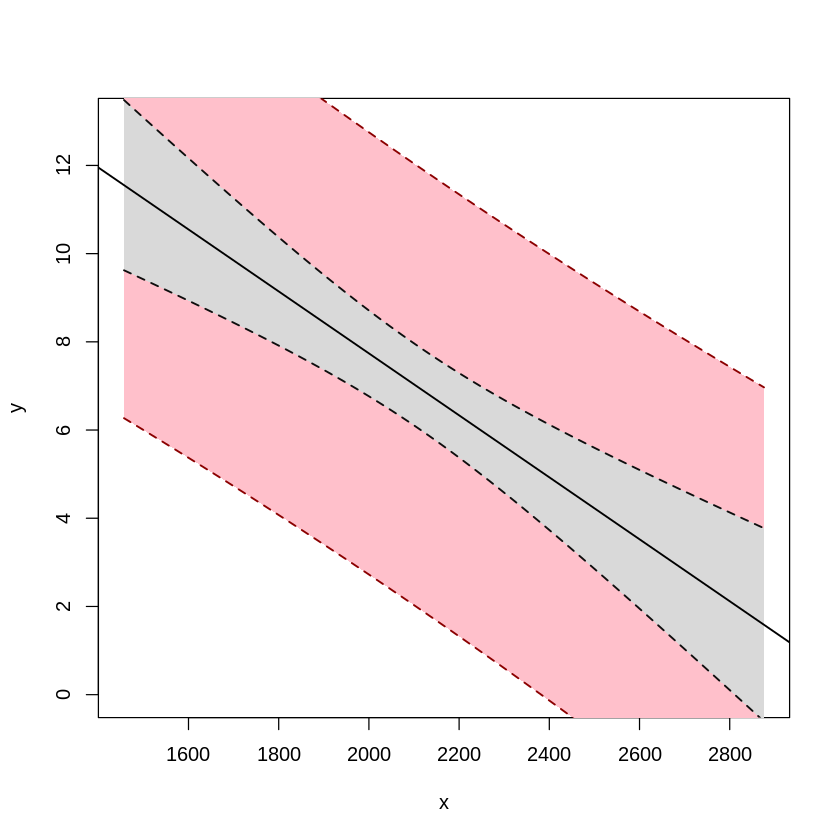

In [15]:
#get predicted y values using regression equation
newx <- seq(min(df$x), max(df$x), length.out=100)

#calculate the confidence interval values
conf <- predict(Football.lm, newdata = data.frame(x=newx), interval = 'confidence', level=0.95)

#calculate the prediction interval values
pred <- predict(Football.lm, newdata = data.frame(x=newx), interval = 'predict', level=0.95)

#create plot of x vs. y, but don't display individual points (type='n') 
plot(y ~ x, data = df, type='n')

#add polygon: Confidence Interval Upper -> Prediction Interval Upper
polygon(c(rev(newx), newx), c(rev(conf[ ,3]), pred[ ,3]), col = 'pink', border = NA)

#add polygon: Predicted Values -> Confidence Interval Upper
polygon(c(rev(newx), newx), c(rev(conf[ ,3]), conf[ ,1]), col = 'gray85', border = NA)

#add polygon: Predicted Values -> Confidence Interval Lower
polygon(c(rev(newx), newx), c(rev(conf[ ,2]), pred[ ,2]), col = 'pink', border = NA)

#add polygon: Confidence Interval Lower -> Prediction Interval Lower
polygon(c(rev(newx), newx), c(rev(conf[ ,2]), conf[ ,1]), col = 'gray85', border = NA)

#add line: Regression
abline(Football.lm, lwd=1.5)

#add line: Confidence Interval Upper
lines(newx, conf[ ,3], lty = 'dashed', col = 'gray5', lwd=1.5)
#add line: Confidence Interval Lower
lines(newx, conf[ ,2], lty = 'dashed', col = 'gray5', lwd=1.5)

#add line: Prediction Interval Upper
lines(newx, pred[ ,3], lty = 'dashed', col = 'red4', lwd=1.5)
#add line: Prediction Interval Upper
lines(newx, pred[ ,2], lty = 'dashed', col = 'red4', lwd=1.5)



## 2.2

In [16]:
# Point Estimate
pred<-predict(Football.lm, data.frame(x = c(1800)), interval="predict", level=0.90)
print(pred)

      fit      lwr      upr
1 9.14307 4.936392 13.34975


## 2.3

In [26]:
dt <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B2.XLS')

df <- data.frame(y=dt$y, x=dt$x4)

head(df)

,y,x
,<dbl>,<dbl>
1,271.8,16.66
2,264.0,16.46
3,238.8,17.66
4,230.7,17.50
5,251.6,16.40
6,257.9,16.28


### a

In [27]:
Solar.lm <- lm(y ~ x, data=df)
print(Solar.lm)


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
      607.1        -21.4  



### b

In [28]:
anova(Solar.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,10578.685,10578.685,69.60944,5.935009e-09
Residuals,27,4103.244,151.972,NA,NA


### c

In [30]:
confint(Solar.lm, level=0.99)

,0.5 %,99.5 %
(Intercept),488.22411,725.98242
x,-28.50995,-14.29497


### d

In [31]:
summary(Solar.lm)$r.squared

[1] 0.7205242

### e

In [32]:
pred<-predict(Solar.lm, data.frame(x = c(16.5)), interval="confidence", level=0.95)
print(pred)

       fit      lwr      upr
1 253.9627 249.1468 258.7787


## 2.4

In [39]:
dt <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B3.XLS')

df <- data.frame(y=dt$y, x=dt$x1)

head(df)

Warning message:
“Unknown or uninitialised column: `y`.”
Warning message:
“Unknown or uninitialised column: `x1`.”


<0 x 0 matrix>

In [43]:
dt <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B3.XLS')

In [44]:
print(dt)

# A tibble: 0 x 0


### a

In [34]:
b

ERROR: Error in eval(expr, envir, enclos): object 'b' not found


In [35]:
c

function (...)  .Primitive("c")

In [36]:
d

ERROR: Error in eval(expr, envir, enclos): object 'd' not found


In [37]:
e

ERROR: Error in eval(expr, envir, enclos): object 'e' not found


In [38]:
f

ERROR: Error in eval(expr, envir, enclos): object 'f' not found
